In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10, 6

In [4]:
# Dataset from https://gist.github.com/curran/a08a1080b88344b0c8a7/
iris = pd.read_csv("iris.csv")
iris.shape

(150, 5)

In [5]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

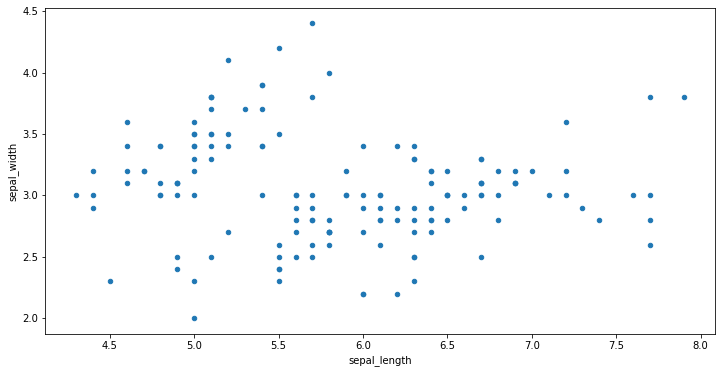

In [10]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', figsize=(12, 6))

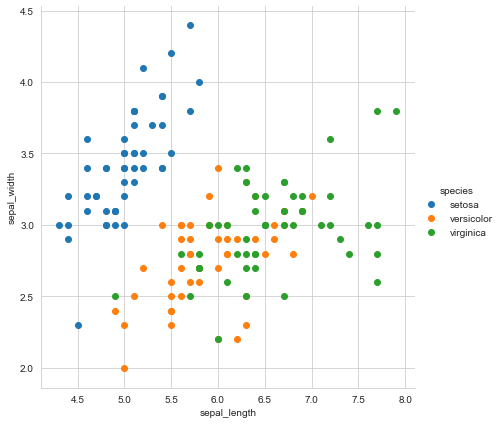

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue='species', height=6).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()


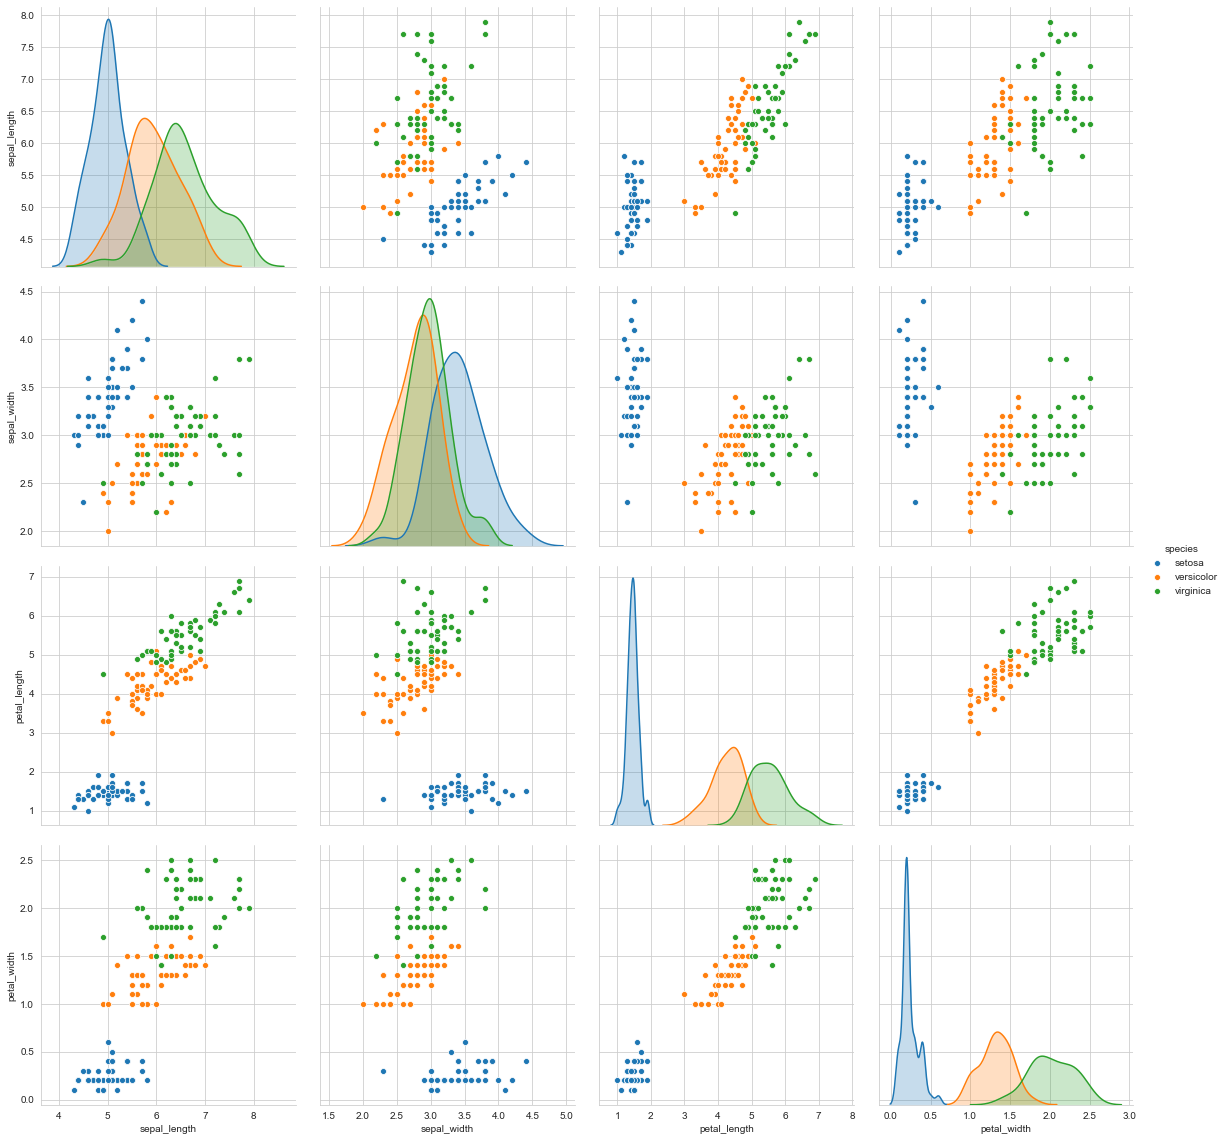

In [17]:
sns.pairplot(iris, hue='species', height=4, diag_kind='kde')

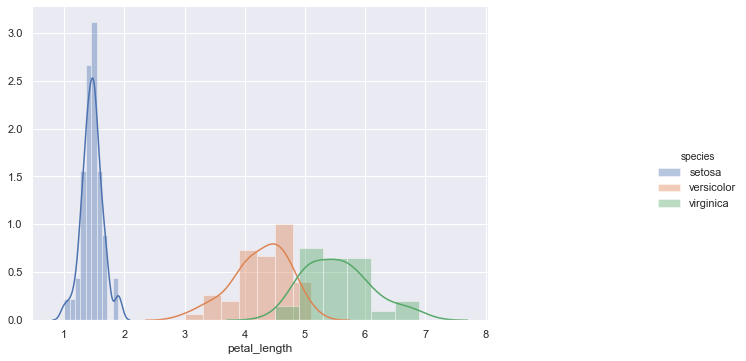

In [31]:
p = sns.FacetGrid(iris, hue='species').map(sns.distplot, 'petal_length').add_legend()
p.fig.set_size_inches(12, 6)

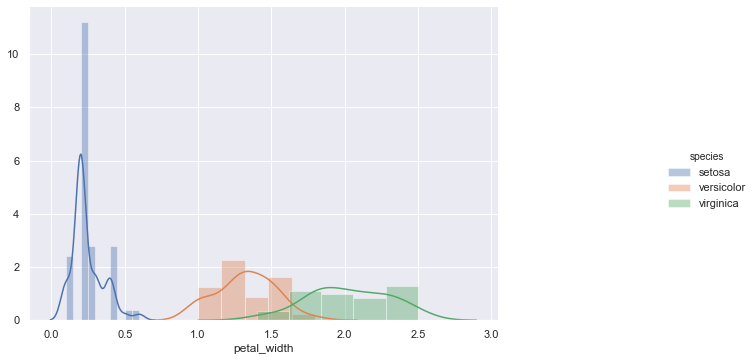

In [32]:
p = sns.FacetGrid(iris, hue='species').map(sns.distplot, 'petal_width').add_legend()
p.fig.set_size_inches(12, 6)

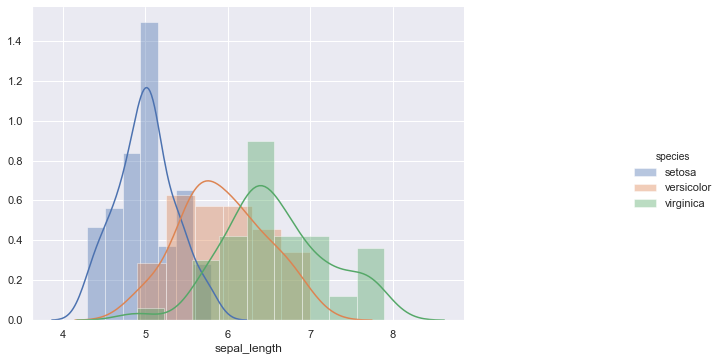

In [33]:
p = sns.FacetGrid(iris, hue='species').map(sns.distplot, 'sepal_length').add_legend()
p.fig.set_size_inches(12, 6)

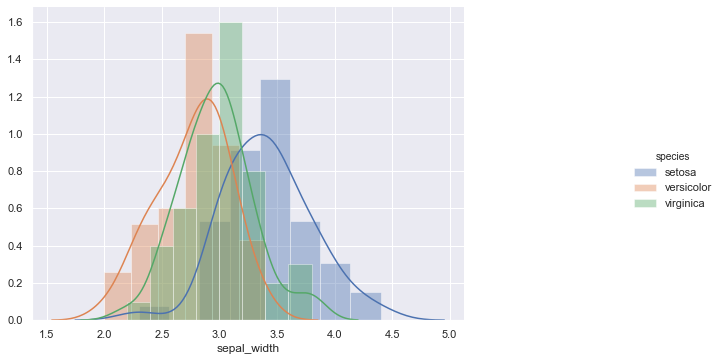

In [34]:
p = sns.FacetGrid(iris, hue='species').map(sns.distplot, 'sepal_width').add_legend()
p.fig.set_size_inches(12, 6)

In [38]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
iris.groupby('species').describe()
# df.head()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

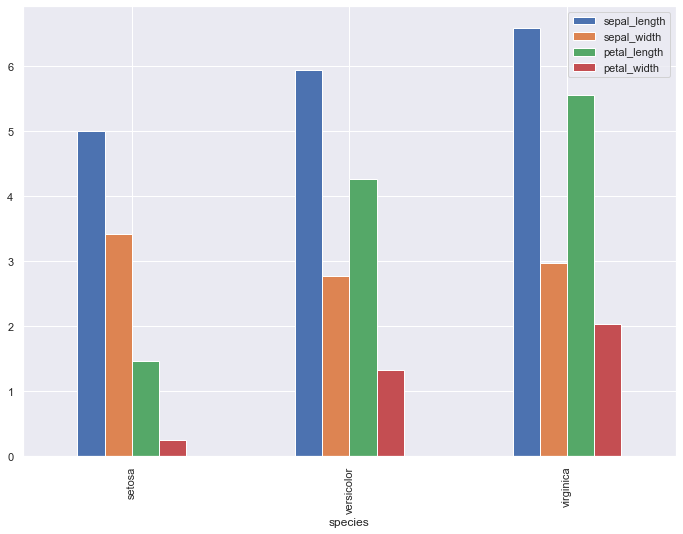

In [48]:
iris.groupby('species').mean().plot(kind='bar')

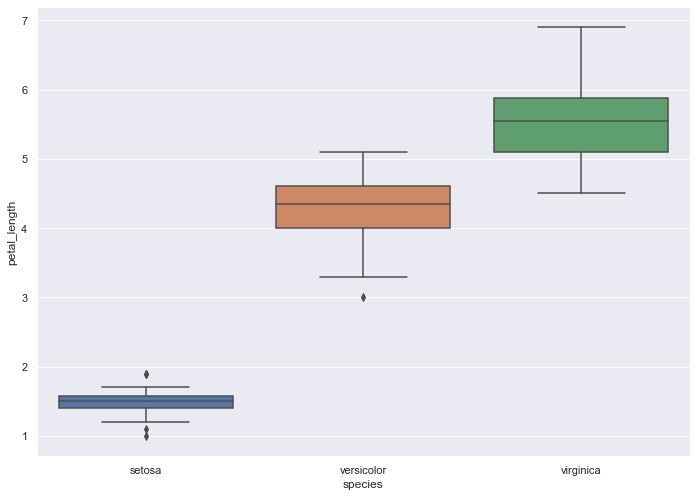

In [50]:
sns.boxplot(x='species', y='petal_length', data=iris)

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [54]:
correlation = iris.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


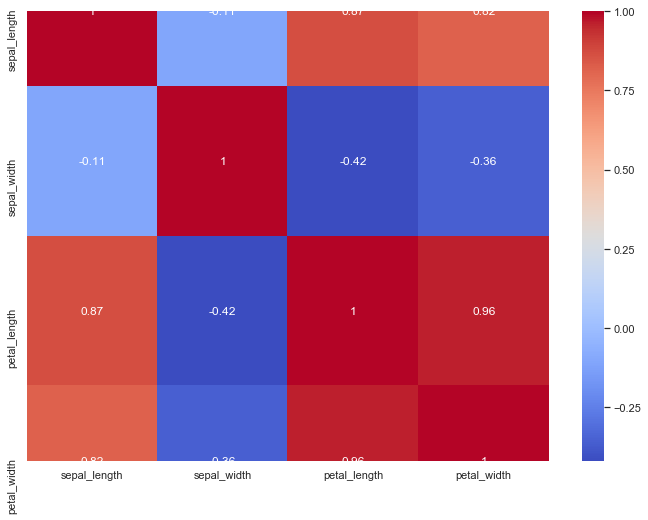

In [56]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df['species'] = le.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print('accuracy: ', model.score(x_test, y_test))

accuracy:  0.9


c:\users\febin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\febin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [82]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train, y_train)
print('accuracy: ', model1.score(x_test, y_test))

accuracy:  0.9666666666666667


In [83]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print('accuracy: ', model2.score(x_test, y_test))

accuracy:  0.9666666666666667
